In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from collections import Counter

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/labeled_data.csv')
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
df['tweet'] = df['tweet'].str.replace(r"@\w+", "", regex=True)

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
df=df.iloc[:,1:]
df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT : As a woman you shouldn't complain abo...
1,3,0,3,0,1,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,3,0,3,0,1,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...
3,3,0,2,1,1,!!!!!!!!! RT : she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT : The shit you hear about me ...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;: right! His ...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [7]:
df['tweet'] = df['tweet'].str.replace('RT', '')
import string
a=string.punctuation
pattern = '[{}]'.format(re.escape(string.punctuation))
def clean(text):
  return re.sub(pattern,'',text)
df['cleaned_tweet'] = df['tweet'].apply(lambda i: clean(i))
df['cleaned_tweet']

0           As a woman you shouldnt complain about clea...
1           boy dats coldtyga dwn bad for cuffin dat ho...
2           Dawg   You ever fuck a bitch and she start ...
3                                   she look like a tranny
4           The shit you hear about me might be true or...
                               ...                        
24778    yous a muthafin lie 8220   right His TL is tra...
24779    youve gone and broke the wrong heart baby and ...
24780    young buck wanna eat dat nigguh like I aint fu...
24781                youu got wild bitches tellin you lies
24782    Ruffled  Ntac Eileen Dahlia  Beautiful color c...
Name: cleaned_tweet, Length: 24783, dtype: object

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stop_words(tweet):
  return ' '.join([word for word in tweet.split() if word.lower() not in stop_words])
df['cleaned_tweet'] = df['cleaned_tweet'].apply(remove_stop_words)
df['cleaned_tweet']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        woman shouldnt complain cleaning house amp man...
1        boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2             Dawg ever fuck bitch start cry confused shit
3                                         look like tranny
4        shit hear might true might faker bitch told ya...
                               ...                        
24778    yous muthafin lie 8220 right TL trash 8230 min...
24779    youve gone broke wrong heart baby drove rednec...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                    youu got wild bitches tellin lies
24782    Ruffled Ntac Eileen Dahlia Beautiful color com...
Name: cleaned_tweet, Length: 24783, dtype: object

In [9]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['cleaned_tweet'])
sequences = tokenizer.texts_to_sequences(df['cleaned_tweet'])
padded_sequences = pad_sequences(sequences, maxlen=20, padding='post')
padded_sequences

array([[ 286,  869,  952, ...,    0,    0,    0],
       [ 139, 1057, 9959, ...,    0,    0,    0],
       [ 667,   96,   12, ...,    0,    0,    0],
       ...,
       [ 277, 2770,   61, ...,    0,    0,    0],
       [5038,   13,  965, ...,    0,    0,    0],
       [8381,  600, 1118, ...,    0,    0,    0]], dtype=int32)

In [10]:
X = padded_sequences
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print('X_train:',X_train)
print('y_train:',y_train)
print('X_test:',X_test)
print('y_test:',y_test)

X_train: [[ 125  385   57 ...    0    0    0]
 [ 231  161   50 ...    0    0    0]
 [  16 6615  223 ...    0    0    0]
 ...
 [ 593 2104 3280 ...    0    0    0]
 [ 210 1699 3165 ...    0    0    0]
 [   2 2163   15 ...    0    0    0]]
y_train: [0 2 1 ... 1 1 1]
X_test: [[  13 1250   70 ...    0    0    0]
 [  27   32    1 ...    0    0    0]
 [  19 1570   17 ...    0    0    0]
 ...
 [   1  205 1770 ...    0    0    0]
 [ 115 8542   88 ...    0    0    0]
 [ 145  109    6 ...    0    0    0]]
y_test: [1 1 2 ... 1 1 1]


In [12]:
model=Sequential()
model.add(Embedding(10000, 128, input_length=20))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 20, 128)           131584    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,469,699
Trainable params: 1,469,699
Non-trainable params: 0
_________________________________________________________________


In [14]:
# callback = EarlyStopping(monitor='val_loss',patience=2,verbose=1,mode='auto')


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32)

Epoch 1/15
620/620 [==============================] - 115s 172ms/step - loss: 0.4036 - accuracy: 0.8640 - val_loss: 0.3237 - val_accuracy: 0.8880
Epoch 2/15
620/620 [==============================] - 106s 172ms/step - loss: 0.2519 - accuracy: 0.9150 - val_loss: 0.3346 - val_accuracy: 0.8846
Epoch 3/15
620/620 [==============================] - 101s 163ms/step - loss: 0.1924 - accuracy: 0.9356 - val_loss: 0.4022 - val_accuracy: 0.8822
Epoch 4/15
620/620 [==============================] - 106s 171ms/step - loss: 0.1522 - accuracy: 0.9512 - val_loss: 0.4156 - val_accuracy: 0.8771
Epoch 5/15
620/620 [==============================] - 100s 161ms/step - loss: 0.1227 - accuracy: 0.9601 - val_loss: 0.4726 - val_accuracy: 0.8753
Epoch 6/15
620/620 [==============================] - 104s 168ms/step - loss: 0.1016 - accuracy: 0.9656 - val_loss: 0.4937 - val_accuracy: 0.8693
Epoch 7/15
620/620 [==============================] - 103s 166ms/step - loss: 0.0864 - accuracy: 0.9708 - val_loss: 0.5001 -

In [17]:
def generate_wordcloud(texts):
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set(['RT']), min_font_size=10).generate(" ".join(texts))
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

Word cloud for racist tweets:


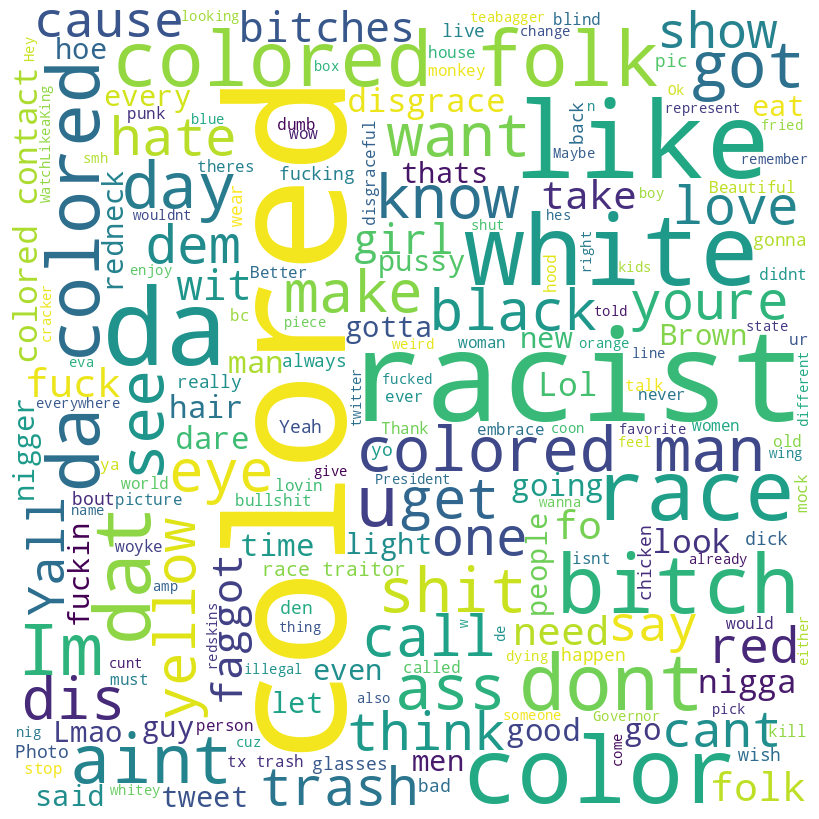

Word cloud for sexist tweets:


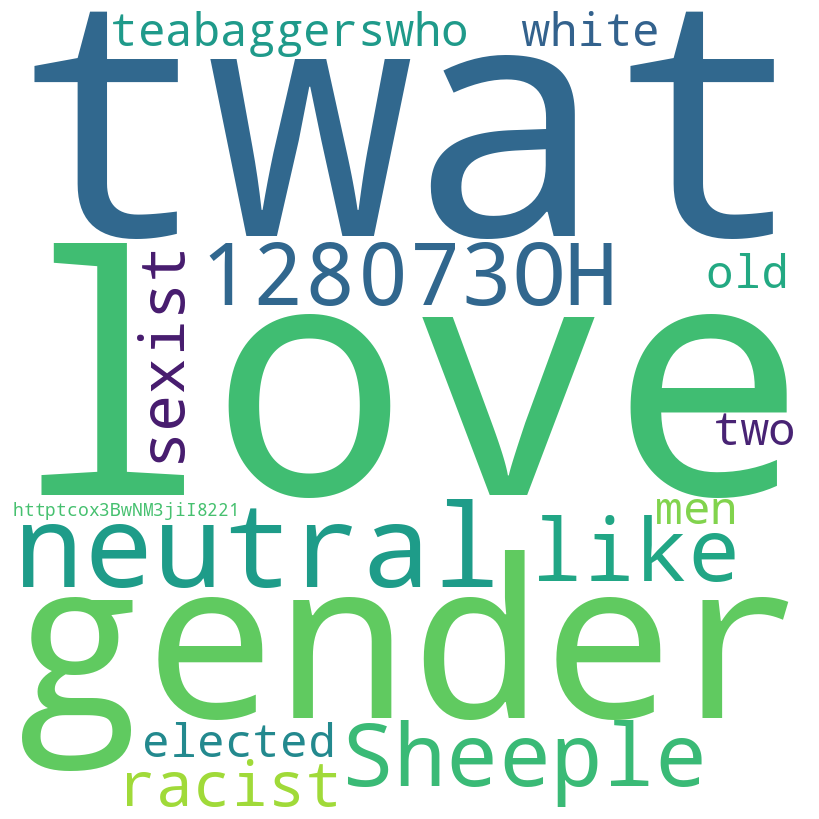

Word cloud for homophobic tweets:


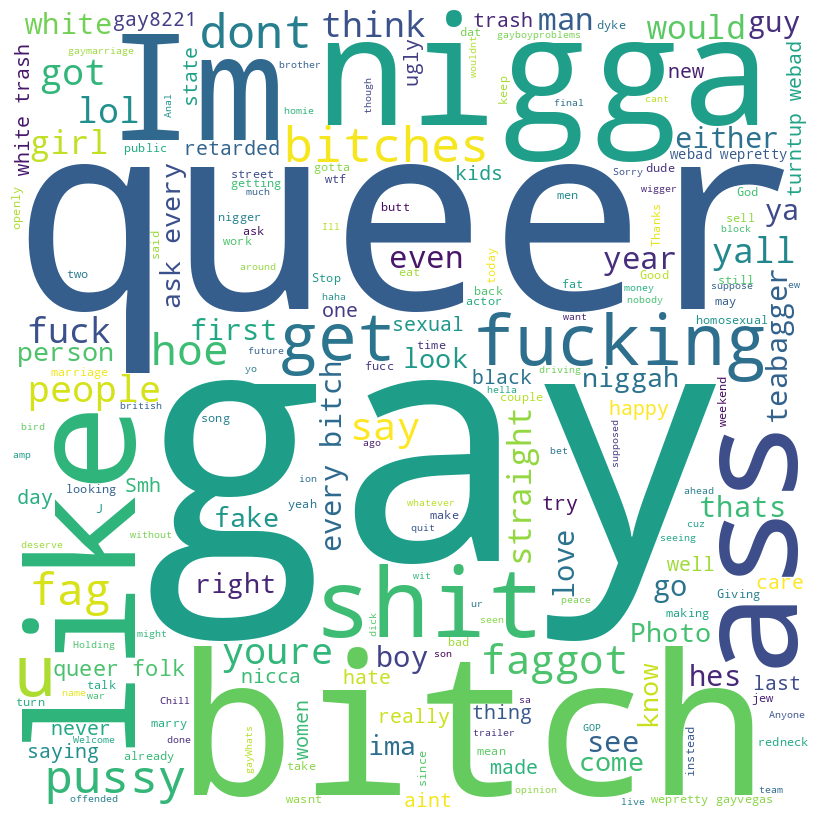

Word cloud for xenophobic tweets:


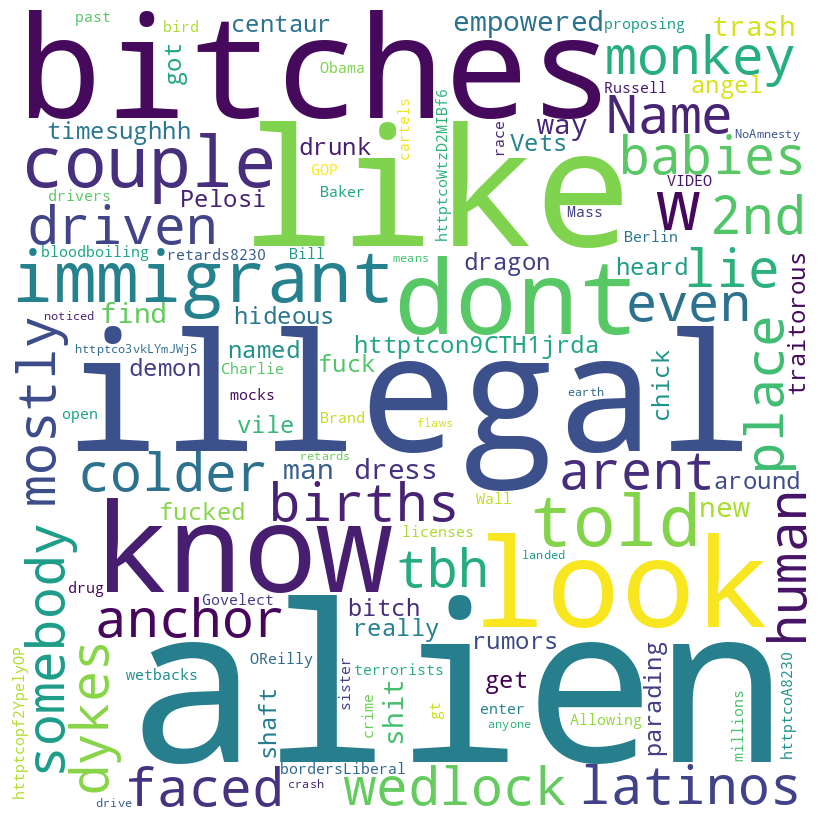

In [18]:
# Assuming a simplistic method where you have keywords for each category to filter tweets:
categories = {
    "racist": ["racist", "race", "color"],
    "sexist": ["sexist", "gender"],
    "homophobic": ["gay", "lgbt", "lgbtq", "homosexual", "queer"],
    "xenophobic": ["foreigner", "xeno", "immigrant", "alien"]
}

for category, keywords in categories.items():
    # Filtering tweets based on keywords (this is a simplistic method; actual categorization may vary)
    category_tweets = df[df['cleaned_tweet'].str.contains('|'.join(keywords))]

    print(f"Word cloud for {category} tweets:")
    generate_wordcloud(category_tweets['cleaned_tweet'])


In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")

155/155 [==============================] - 4s 28ms/step - loss: 0.9412 - accuracy: 0.8531
Model Accuracy: 85.31%


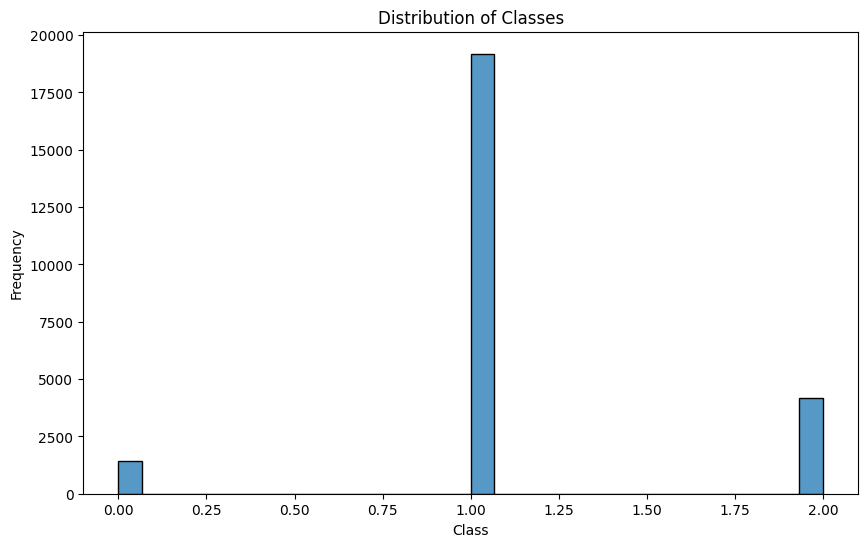

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['class'], kde=False, bins=30)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

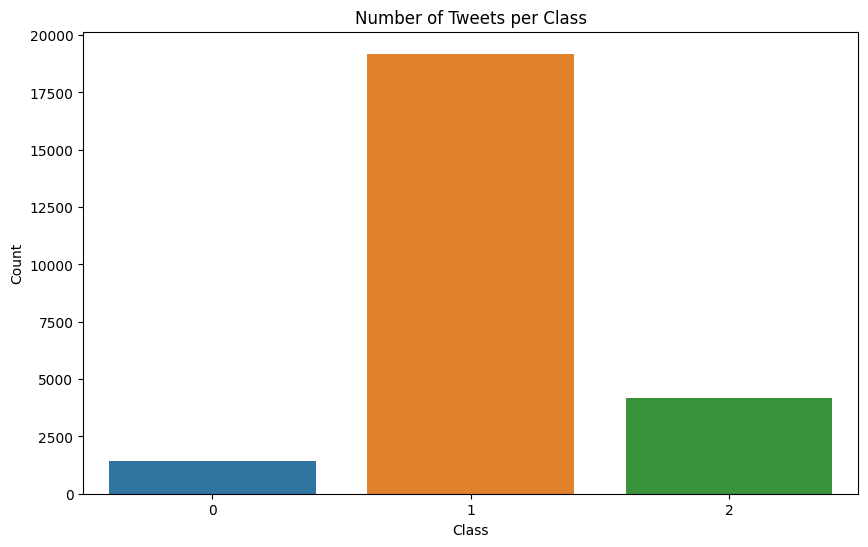

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title('Number of Tweets per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

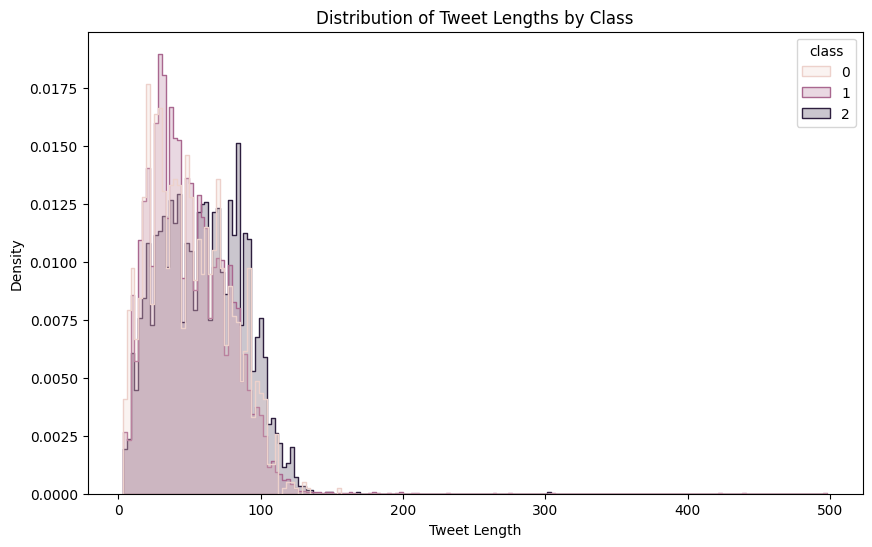

In [22]:
df['tweet_length'] = df['cleaned_tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='tweet_length', hue='class', element='step', stat='density', common_norm=False)
plt.title('Distribution of Tweet Lengths by Class')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.show()


<ipython-input-23-6904c664f1d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


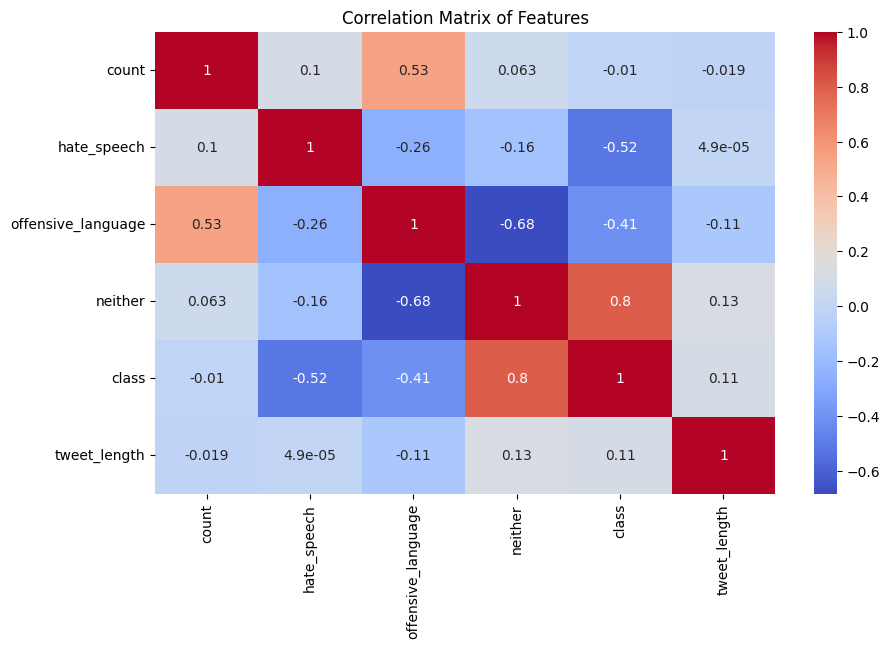

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

155/155 [==============================] - 3s 17ms/step
              precision    recall  f1-score   support

           0       0.25      0.23      0.24       290
           1       0.91      0.92      0.91      3832
           2       0.79      0.77      0.78       835

    accuracy                           0.85      4957
   macro avg       0.65      0.64      0.64      4957
weighted avg       0.85      0.85      0.85      4957



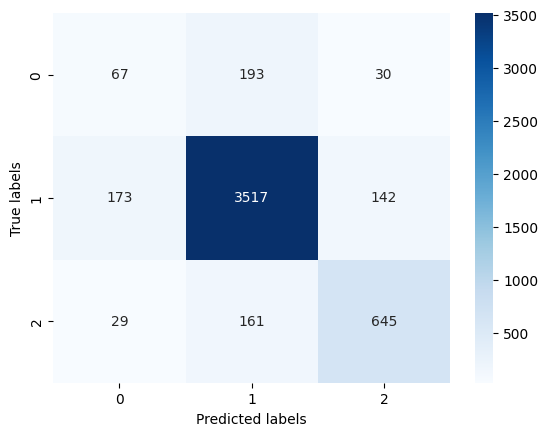

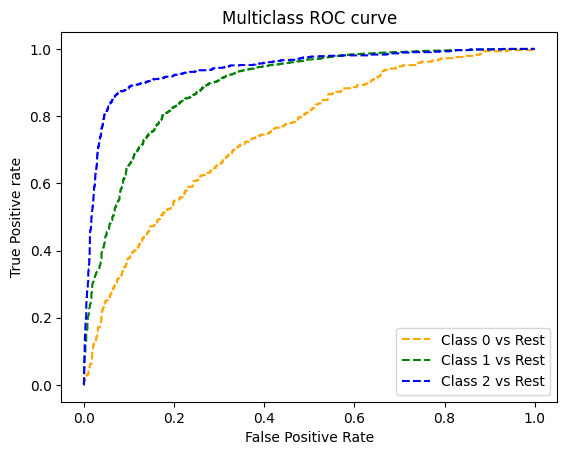

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# ROC for multi-class (if 'class' is indeed a multi-class and not binary)
fpr = {}
tpr = {}
thresh ={}
n_class = 3  # Number of classes
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred[:, i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


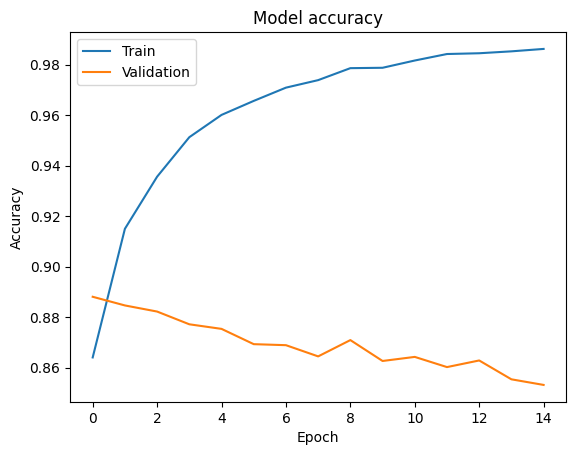

In [25]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


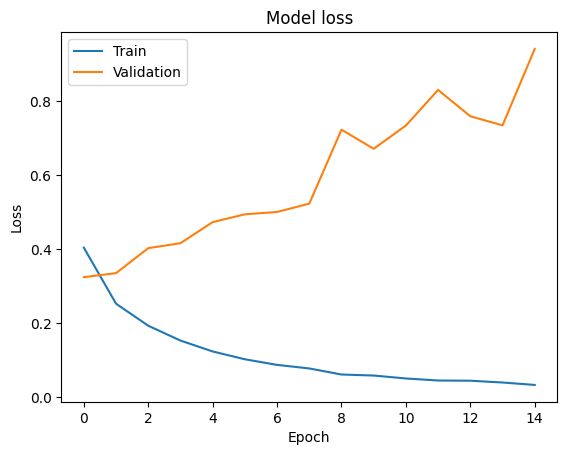

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
